# Residual Attention Network for Image Classification

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from utils.model import ResidualAttentionNetwork

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, shuffle=True)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
 
train_images = train_images/255
test_images = test_images/255
val_images = val_images/255
    
print(f"Train samples: {train_images.shape}, {train_labels.shape}")
print(f"val samples: {val_images.shape}, {val_labels.shape}")
print(f"Test samples: {test_images.shape}, {test_labels.shape}")

Train samples: (45000, 32, 32, 3), (45000, 1)
val samples: (5000, 32, 32, 3), (5000, 1)
Test samples: (10000, 32, 32, 3), (10000, 1)


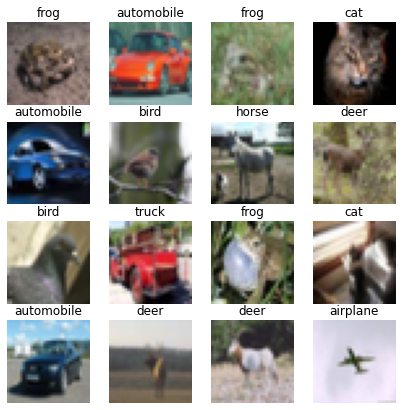

In [3]:
plt.figure(figsize=(7, 7))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [4]:
tf.keras.backend.clear_session()

resattnet = ResidualAttentionNetwork()
inputs = tf.keras.Input((32, 32, 3))
resattnet(inputs)
resattnet.summary()

Model: "residual_attention_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 32, 32, 32)        0         
_________________________________________________________________
residual__unit (Residual_Uni (None, 16, 16, 128)       19200     
_________________________________________________________________
attention__module (Attention (None, 16, 16, 128)       197376    
_________________________________________________________________
residual__unit_10 (Residual_ (None, 8, 8, 256)         95744     
_________________________________________________________________
attention__module_1 (Attenti (None, 8, 8

In [5]:
optimizer = tf.keras.optimizers.SGD(lr=0.1, decay=1e-4, momentum=0.9)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metrics = ['accuracy']
resattnet.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [6]:
hist = resattnet.fit(
    x=train_images,
    y=train_labels,
    validation_data=(val_images, val_labels),
    batch_size=128,
    epochs=10,
    shuffle=True
)
# resattnet.save_weights('./gan_save/ckpt')

Epoch 1/10
352/352 [==============================] - 34s 65ms/step - loss: 1.9304 - accuracy: 0.3153 - val_loss: 1.4102 - val_accuracy: 0.4710
Epoch 2/10
352/352 [==============================] - 21s 61ms/step - loss: 1.2533 - accuracy: 0.5496 - val_loss: 1.3220 - val_accuracy: 0.5580
Epoch 3/10
352/352 [==============================] - 22s 62ms/step - loss: 0.9651 - accuracy: 0.6531 - val_loss: 1.0915 - val_accuracy: 0.6320
Epoch 4/10
352/352 [==============================] - 22s 62ms/step - loss: 0.7471 - accuracy: 0.7327 - val_loss: 1.0781 - val_accuracy: 0.6332
Epoch 5/10
352/352 [==============================] - 22s 63ms/step - loss: 0.6040 - accuracy: 0.7861 - val_loss: 1.1614 - val_accuracy: 0.6526
Epoch 6/10
352/352 [==============================] - 22s 63ms/step - loss: 0.4784 - accuracy: 0.8303 - val_loss: 1.0367 - val_accuracy: 0.6842
Epoch 7/10
352/352 [==============================] - 22s 64ms/step - loss: 0.3786 - accuracy: 0.8680 - val_loss: 1.0522 - val_accuracy: